In [56]:
!pip install --upgrade pip
!pip install imutils
!pip install opencv-python

In [57]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from IPython.display import Image
from imutils import paths
import numpy as np
import cv2
import os

In [58]:
def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In [59]:
imagePaths = sorted(list(paths.list_images('train')))
data = []
labels = []

for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath, 1)
    label = imagePath.split(os.path.sep)[-1].split(".")[0]
    hist = extract_histogram(image)
    data.append(hist)
    labels.append(label)

0


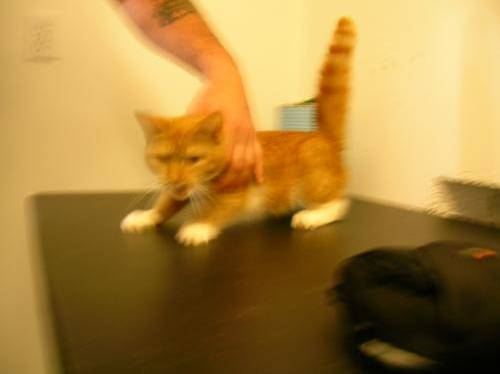

In [60]:
le = LabelEncoder()
labels = le.fit_transform(labels)
print(labels[0])
Image(filename=imagePaths[0])

In [61]:
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(data), labels, test_size=0.25, random_state=10)

In [62]:
model = LinearSVC(random_state = 10, C = 1.27)
model.fit(trainData, trainLabels)

LinearSVC(C=1.27, random_state=10)

In [63]:
predictions = model.predict(testData)

In [64]:
print(classification_report(testLabels, predictions, target_names=le.classes_))

              precision    recall  f1-score   support

         cat       0.53      0.65      0.58       123
         dog       0.56      0.43      0.49       127

    accuracy                           0.54       250
   macro avg       0.54      0.54      0.54       250
weighted avg       0.54      0.54      0.53       250



In [65]:
from sklearn.metrics import f1_score
predictions = model.predict(testData)
f1_score(testLabels, predictions, average='macro')

0.5353535353535354

In [66]:
model.coef_

array([[-4.68856741e-01,  7.36670788e-01, -3.43683628e-01,
        -1.95022224e-01,  5.44470172e-01,  8.31590895e-01,
         1.83094299e-01, -6.21371339e-01,  3.85444185e-01,
        -9.27000662e-02, -4.15023831e-01,  1.14323597e+00,
        -2.48099685e-01, -2.50235634e-01, -2.31001872e-01,
        -1.13236265e+00, -6.26558483e-02, -1.22385863e-02,
         1.26778001e+00,  2.68201475e-01, -4.83492651e-01,
        -9.33090172e-02,  8.13075320e-02, -8.06063242e-03,
         1.75455085e-02,  1.94904976e-01,  5.61489440e-02,
         3.34158992e-01,  6.94024922e-01, -2.88558811e-01,
        -3.02975817e-02,  7.36485072e-02, -5.99149371e-03,
         7.61599052e-01,  1.95901948e-01, -3.56393064e-03,
         5.20643088e-02, -1.62992831e-02, -8.12466944e-02,
         3.77926683e-01, -4.57103162e-03,  6.64513387e-02,
         7.53688276e-02,  6.45379913e-03, -1.01755940e-03,
        -5.39226763e-02, -7.00140287e-02,  1.14710118e-02,
        -8.62458794e-04,  0.00000000e+00,  0.00000000e+0

In [69]:
singleImage = cv2.imread('cat.1043.jpg')
histt = extract_histogram(singleImage)
histt2 = histt.reshape(1, -1)
prediction = model.predict(histt2)
prediction

array([1], dtype=int64)